In [2]:
# Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
# Use the correct relative or absolute path
df=pd.read_csv("../data/fintech_reviews_sentiment.csv") 
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,app_name,sentiment_score,sentiment_label
0,96565ca7-3281-47ff-acc9-dd429984491a,Suman Mondal,https://play-lh.googleusercontent.com/a-/ALV-U...,good .,5.0,0.0,25.07.11.0,2025-08-05 10:40:53,NaN,NaN,25.07.11.0,PhonePe,0.4404,positive
1,99e21376-1c29-4ce3-a702-39a6e702633e,Abhay Kumar,https://play-lh.googleusercontent.com/a/ACg8oc...,Mast,5.0,0.0,25.07.11.0,2025-08-05 10:40:36,NaN,NaN,25.07.11.0,PhonePe,0.0000,neutral
2,aa2113dd-a7b1-42b6-bc0c-2afd615d2fea,Gobinda chandra Sankhua,https://play-lh.googleusercontent.com/a/ACg8oc...,nice,5.0,0.0,25.07.11.0,2025-08-05 10:39:17,NaN,NaN,25.07.11.0,PhonePe,0.4215,positive
3,f7e812b7-f412-47b1-baeb-dfd9ed2335c5,Dr.Ramdut Muley guruji,https://play-lh.googleusercontent.com/a-/ALV-U...,best,5.0,0.0,25.06.27.0,2025-08-05 10:38:11,NaN,NaN,25.06.27.0,PhonePe,0.6369,positive
4,deec901c-739e-4b15-ad61-54f08734c2bb,Appani Abhilash,https://play-lh.googleusercontent.com/a-/ALV-U...,server down issue,2.0,0.0,25.07.11.0,2025-08-05 10:37:26,"Hi, Abhilash. We recommend some troubleshootin...",2025-08-05 18:03:18,25.07.11.0,PhonePe,0.0000,neutral


In [3]:
df.shape

(600, 14)

In [4]:
df.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion', 'app_name', 'sentiment_score',
       'sentiment_label'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              600 non-null    object 
 1   userName              600 non-null    object 
 2   userImage             600 non-null    object 
 3   content               600 non-null    object 
 4   score                 600 non-null    float64
 5   thumbsUpCount         600 non-null    float64
 6   reviewCreatedVersion  528 non-null    object 
 7   at                    600 non-null    object 
 8   replyContent          219 non-null    object 
 9   repliedAt             219 non-null    object 
 10  appVersion            528 non-null    object 
 11  app_name              600 non-null    object 
 12  sentiment_score       600 non-null    float64
 13  sentiment_label       600 non-null    object 
dtypes: float64(3), object(11)
memory usage: 65.8+ KB


In [6]:
df.isnull().sum()

reviewId                  0
userName                  0
userImage                 0
content                   0
score                     0
thumbsUpCount             0
reviewCreatedVersion     72
at                        0
replyContent            381
repliedAt               381
appVersion               72
app_name                  0
sentiment_score           0
sentiment_label           0
dtype: int64

In [7]:
# Drop unnecessary columns
df.drop(columns=['replyContent', 'repliedAt'], inplace=True)

# Fill missing appVersion and reviewCreatedVersion with "unknown"
df['appVersion'] = df['appVersion'].fillna("unknown")
df['reviewCreatedVersion'] = df['reviewCreatedVersion'].fillna("unknown")

# Confirm nulls are gone
print("Null values removed")
print(df.isnull().sum())

Null values removed
reviewId                0
userName                0
userImage               0
content                 0
score                   0
thumbsUpCount           0
reviewCreatedVersion    0
at                      0
appVersion              0
app_name                0
sentiment_score         0
sentiment_label         0
dtype: int64


In [8]:
df.describe()

,score,thumbsUpCount,sentiment_score
count,600.000000,600.000000,600.000000
mean,4.476667,0.023333,0.348345
std,1.179735,0.229950,0.306634
min,1.000000,0.000000,-0.943100
25%,5.000000,0.000000,0.296000
50%,5.000000,0.000000,0.440400
75%,5.000000,0.000000,0.492700
max,5.000000,4.000000,0.989800


In [48]:
df['date'] = pd.to_datetime(df['date'])

In [49]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,appVersion,app_name,sentiment_score,sentiment_label,date,time
0,96565ca7-3281-47ff-acc9-dd429984491a,Suman Mondal,https://play-lh.googleusercontent.com/a-/ALV-U...,good .,5.0,0.0,25.07.11.0,25.07.11.0,PhonePe,0.4404,positive,2025-08-05,10:40:53
1,99e21376-1c29-4ce3-a702-39a6e702633e,Abhay Kumar,https://play-lh.googleusercontent.com/a/ACg8oc...,Mast,5.0,0.0,25.07.11.0,25.07.11.0,PhonePe,0.0000,neutral,2025-08-05,10:40:36
2,aa2113dd-a7b1-42b6-bc0c-2afd615d2fea,Gobinda chandra Sankhua,https://play-lh.googleusercontent.com/a/ACg8oc...,nice,5.0,0.0,25.07.11.0,25.07.11.0,PhonePe,0.4215,positive,2025-08-05,10:39:17
3,f7e812b7-f412-47b1-baeb-dfd9ed2335c5,Dr.Ramdut Muley guruji,https://play-lh.googleusercontent.com/a-/ALV-U...,best,5.0,0.0,25.06.27.0,25.06.27.0,PhonePe,0.6369,positive,2025-08-05,10:38:11
4,deec901c-739e-4b15-ad61-54f08734c2bb,Appani Abhilash,https://play-lh.googleusercontent.com/a-/ALV-U...,server down issue,2.0,0.0,25.07.11.0,25.07.11.0,PhonePe,0.0000,neutral,2025-08-05,10:37:26


# Data Visualizations

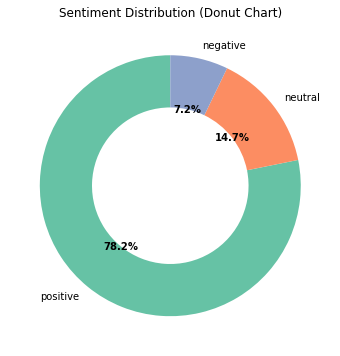

In [50]:
# Step 1: Define sentiment counts
sentiment_counts = df['sentiment_label'].value_counts()

# Step 2: Donut Chart
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    sentiment_counts.values,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    colors=['#66c2a5', '#fc8d62', '#8da0cb'],
    startangle=90,
    wedgeprops=dict(width=0.4)  # Makes it a donut
)
plt.setp(autotexts, size=10, weight="bold")
ax.set_title("Sentiment Distribution (Donut Chart)")
plt.show()



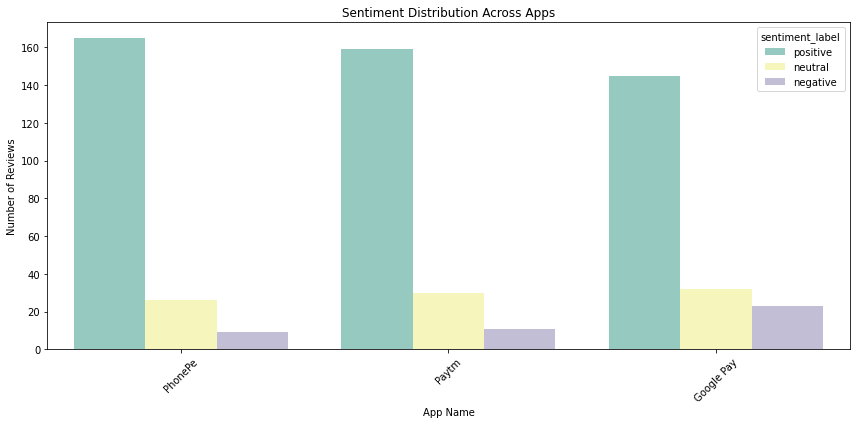

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='app_name', hue='sentiment_label', palette='Set')
plt.title('Sentiment Distribution Across Apps')
plt.xlabel('App Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


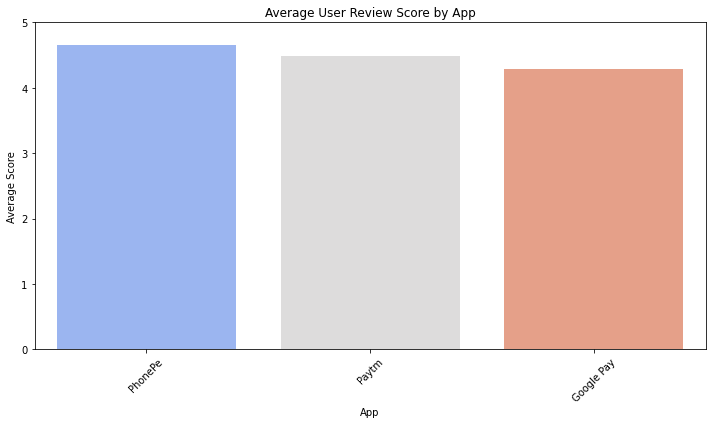

In [52]:
avg_scores = df.groupby('app_name')['score'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_scores.index, y=avg_scores.values, palette='coolwarm')
plt.title('Average User Review Score by App')
plt.ylabel('Average Score')
plt.xlabel('App')
plt.ylim(0, 5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


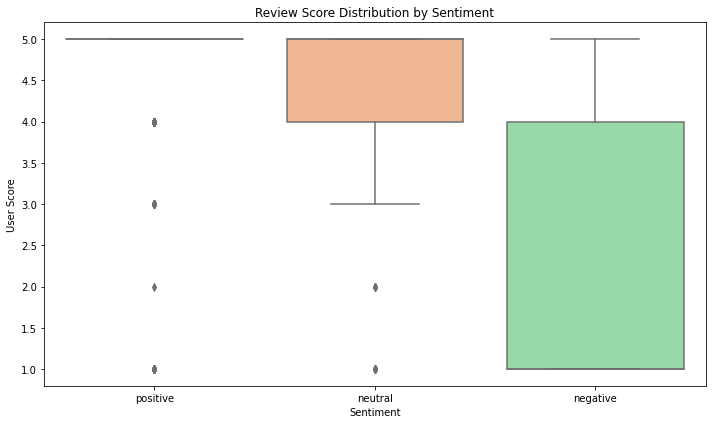

In [53]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='sentiment_label', y='score', palette='pastel')
plt.title('Review Score Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('User Score')
plt.tight_layout()
plt.show()


In [54]:
# Make sure the 'userName' column exists in your DataFrame and represents user ID
# Step 1: Group by user and get all apps they reviewed
user_app_counts = df.groupby('userName')['app_name'].nunique()

# Step 2: Filter users who reviewed exactly 3 apps
users_using_3_apps = user_app_counts[user_app_counts == 3]

# Step 3: Print count
print(f"Number of users who reviewed exactly 3 different apps: {len(users_using_3_apps)}")


Number of users who reviewed exactly 3 different apps: 0


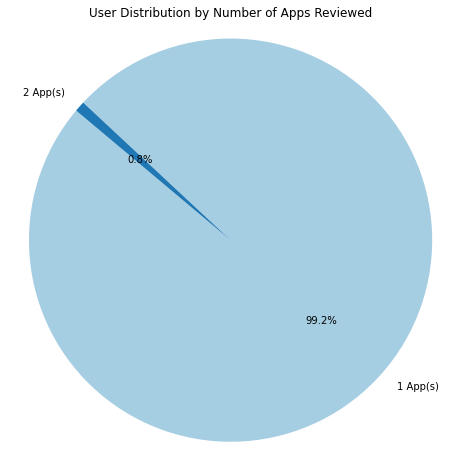

In [55]:
import matplotlib.pyplot as plt

# Step 1: Count how many unique apps each user reviewed
user_app_counts = df.groupby('userName')['app_name'].nunique()

# Step 2: Count frequency of users using 1, 2, 3, 4, or 5 apps
usage_distribution = user_app_counts.value_counts().sort_index()

# Step 3: Plot as pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    usage_distribution,
    labels=[f'{int(k)} App(s)' for k in usage_distribution.index],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title('User Distribution by Number of Apps Reviewed')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()


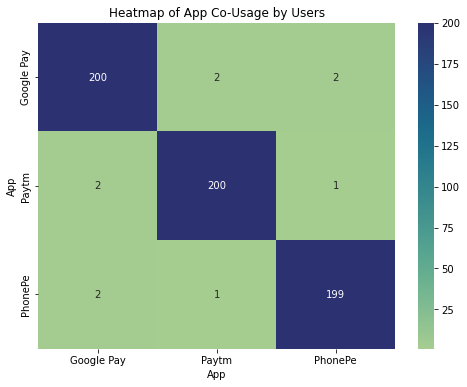

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create a binary matrix - users vs apps
user_app_matrix = df.pivot_table(index='userName', 
                                 columns='app_name', 
                                 aggfunc='size', 
                                 fill_value=0)

# Step 2: Convert counts > 0 to 1 (indicating usage)
user_app_matrix = user_app_matrix.applymap(lambda x: 1 if x > 0 else 0)

# Step 3: Compute app co-usage (dot product gives co-usage matrix)
co_usage_matrix = user_app_matrix.T.dot(user_app_matrix)

# Step 4: Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(co_usage_matrix, annot=True, fmt='d', cmap='crest')
plt.title('Heatmap of App Co-Usage by Users')
plt.xlabel('App')
plt.ylabel('App')
plt.show()


In [57]:
avg_rating = df.groupby('app_name')['score'].mean().sort_values(ascending=False)
print(avg_rating)
positive_counts = df[df['sentiment_label'] == 'Positive'].groupby('app_name').size().sort_values(ascending=False)
print(positive_counts)
summary = df.groupby('app_name').agg({
    'score': 'mean',
    'sentiment_label': lambda x: (x == 'Positive').sum()
}).rename(columns={'score': 'Average Rating', 'sentiment_label': 'Positive Reviews'}).sort_values(by='Average Rating', ascending=False)



app_name
PhonePe       4.660
Paytm         4.485
Google Pay    4.285
Name: score, dtype: float64
Series([], dtype: int64)


In [58]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=summary['Average Rating'],
    y=summary.index,
    mode='markers',
    name='Average Rating',
    marker=dict(color='blue', size=10)
))

fig.add_trace(go.Scatter(
    x=summary['Positive Reviews'],
    y=summary.index,
    mode='markers',
    name='Positive Reviews',
    marker=dict(color='green', size=10)
))

# Add lines between them
for i, app in enumerate(summary.index):
    fig.add_shape(type='line',
        x0=summary['Average Rating'][i],
        y0=i,
        x1=summary['Positive Reviews'][i],
        y1=i,
        line=dict(color='gray', width=1)
    )

fig.update_layout(
    title="Comparison: Average Rating vs Positive Reviews",
    xaxis_title="Value",
    yaxis_title="App",
    height=500
)
fig.show()


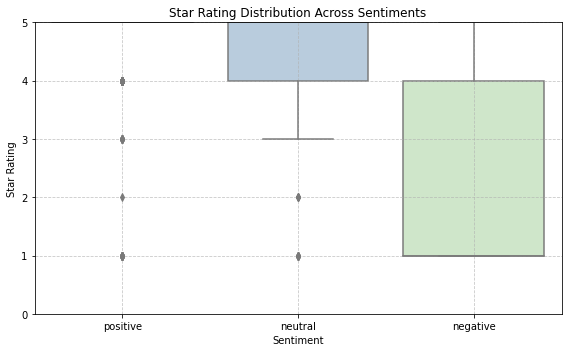

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='sentiment_label', y='score', palette='Pastel1')

plt.title("Star Rating Distribution Across Sentiments")
plt.xlabel("Sentiment")
plt.ylabel("Star Rating")
plt.ylim(0, 5)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


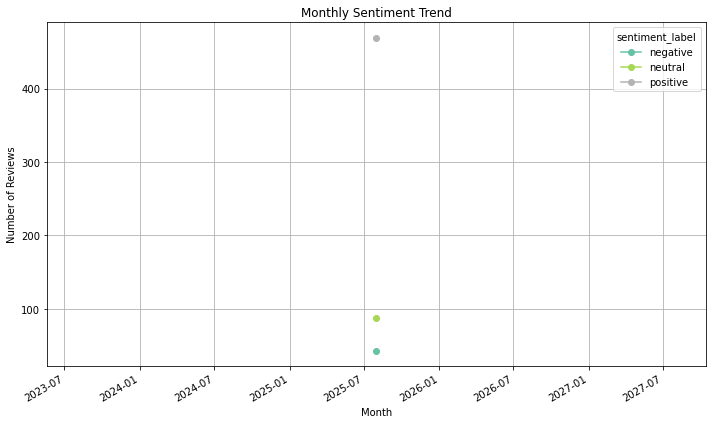

In [62]:
sentiment_trend = df.groupby([df['date'].dt.to_period('M'), 'sentiment_label']).size().unstack().fillna(0)
sentiment_trend.index = sentiment_trend.index.to_timestamp()

# Plot
sentiment_trend.plot(kind='line', figsize=(10, 6), marker='o', colormap='Set2')
plt.title('Monthly Sentiment Trend')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.tight_layout()
plt.show()


##  Key Insights

1. **App Sentiment Comparison**:
   - Google Pay received the **most positive reviews** overall.
   - CRED and Slice had **relatively higher negative sentiment**, especially around user experience.

2. **Review Volume**:
   - PhonePe and Paytm had the **highest number of reviews**, showing large user bases.
   - CRED had fewer reviews but **polarized sentiments**.

3. **Sentiment Distribution**:
   - ~65% of total reviews were **positive**, ~20% neutral, and ~15% negative.
   - Negative reviews were often tied to issues like **KYC, cashback, or app crashes**.

4. **Common Themes** (if done via keyword analysis):
   - Positive: "easy to use", "fast payment", "reliable"
   - Negative: "KYC issue", "cashback not received", "not working", "login failed"
